In [29]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [30]:
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from math import sqrt

In [160]:
FinDaDr = pd.read_csv('C:/Users/hp/FIN_DATA/Final_Data_Draft_Yield.csv')
FinDaDr.head()

,Unnamed: 0,Unnamed: 0.1,Zone,Year,PRECIP,TMPMAX,TMPMIN,RELHUM,WINDLY,SUNHRS,Irrg_Yes,Irrg_No,Seed_Improved,Seed_Not_Improved,Damage_Yes,Damage_No,Dreason_Crop_disease,Dreason_Frost,Dreason_Floods,Dreason_Locust,Dreason_Insects,Dreason_Toolittle_rain,Dreason_Toomuch_rain,Dreason_Wild_animals,Dreason_Birds,Dreason_Hail,Dreason_Weeds,Dreason_ShortageSeed,Dreason_DepletionSoil,Dreason_Security,Dreason_UseBadCrop,Dmeasure_Yes,Dmeasure_No,Dmtype_Chemical,Dmtype_NonChemical,Dmtype_Both,Dmchem_Insecticide,Dmchem_Herbicide,Dmchem_Fungicide,Dmchem_Insectcide_Her,Dmchem_Insectcide_Fun,Dmchem_Herbicide_Fung,Dmchem_All,Fert_Yes,Fert_No,Ferttype_Natural,Ferttype_Chemical,Ferttype_Both,D22a_Urea,D22a_DAP,D22a_Urea_DAP,D22a_NPS,D22a_Urea_NPS,D22a_Mixed,D23_Manure,D23_Compost,D23_Organic,D23_Manure_Compost,D23_Manure_Organic,D23_Compost_Organic,D23_All,Fweight,Area,Production,Crop,CropLabel
0,0,0,1,1997,69.269978,29.656865,14.336538,52.592245,1.698718,12.359170,0.0,72.0,0.0,72.0,22.0,48.0,0.0,0.0,0.0,0.0,4.0,12.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,71.0,0.0,0.0,70.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,50.0,16.0,6.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,13.0,1.0,0.0,1.0,0.0,0.0,0.0,10983.27,500.000000,1863.00,1,0.0
1,1,1,2,1997,57.647542,29.802796,19.996551,45.495155,1.698718,34.862082,14.0,1449.0,6.0,1457.0,880.0,582.0,31.0,7.0,10.0,37.0,223.0,343.0,37.0,8.0,60.0,79.0,9.0,0.0,21.0,0.0,15.0,1430.0,32.0,42.0,1303.0,85.0,20.0,14.0,0.0,4.0,0.0,0.0,0.0,1103.0,360.0,648.0,246.0,196.0,18.0,12.0,408.0,0.0,0.0,0.0,570.0,81.0,0.0,177.0,0.0,0.0,0.0,305751.82,20893.000000,207514.00,1,1.0
2,2,2,3,1997,34.947796,24.863651,9.024471,57.551787,7.858578,12.400941,25.0,2474.0,27.0,2472.0,2129.0,370.0,3.0,3.0,4.0,2.0,764.0,1259.0,14.0,12.0,11.0,29.0,6.0,0.0,9.0,0.0,13.0,2465.0,34.0,7.0,2447.0,11.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1809.0,690.0,1110.0,401.0,297.0,58.0,128.0,510.0,0.0,0.0,0.0,978.0,255.0,0.0,156.0,0.0,0.0,0.0,348274.08,25691.000000,223088.00,1,1.0
3,3,3,4,1997,60.206309,38.878724,26.824670,47.743268,10.645464,18.271932,0.0,74.0,0.0,74.0,1.0,73.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,1.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,22.0,43.0,9.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,29.0,10.0,0.0,4.0,0.0,0.0,0.0,6040.31,2414.881429,24166.85,1,1.0
4,4,4,1,1998,78.737179,27.805128,18.107981,52.592245,1.575641,11.397638,0.0,72.0,0.0,72.0,22.0,48.0,0.0,0.0,0.0,0.0,4.0,12.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,71.0,0.0,0.0,70.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,50.0,16.0,6.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,13.0,1.0,0.0,1.0,0.0,0.0,0.0,10983.27,587.580000,5000.41,1,1.0


In [161]:
# Let's separate into train and test set
# Remember to set the seed (random_state for this sklearn function)

X_train, X_test, y_train, y_test = train_test_split(FinDaDr, FinDaDr.CropLabel,
                                                    test_size=0.2,
                                                    random_state=0) # we are setting the seed here
X_train.shape, X_test.shape

((332, 66), (84, 66))

In [162]:
FinDaDr.head()

,Unnamed: 0,Unnamed: 0.1,Zone,Year,PRECIP,TMPMAX,TMPMIN,RELHUM,WINDLY,SUNHRS,Irrg_Yes,Irrg_No,Seed_Improved,Seed_Not_Improved,Damage_Yes,Damage_No,Dreason_Crop_disease,Dreason_Frost,Dreason_Floods,Dreason_Locust,Dreason_Insects,Dreason_Toolittle_rain,Dreason_Toomuch_rain,Dreason_Wild_animals,Dreason_Birds,Dreason_Hail,Dreason_Weeds,Dreason_ShortageSeed,Dreason_DepletionSoil,Dreason_Security,Dreason_UseBadCrop,Dmeasure_Yes,Dmeasure_No,Dmtype_Chemical,Dmtype_NonChemical,Dmtype_Both,Dmchem_Insecticide,Dmchem_Herbicide,Dmchem_Fungicide,Dmchem_Insectcide_Her,Dmchem_Insectcide_Fun,Dmchem_Herbicide_Fung,Dmchem_All,Fert_Yes,Fert_No,Ferttype_Natural,Ferttype_Chemical,Ferttype_Both,D22a_Urea,D22a_DAP,D22a_Urea_DAP,D22a_NPS,D22a_Urea_NPS,D22a_Mixed,D23_Manure,D23_Compost,D23_Organic,D23_Manure_Compost,D23_Manure_Organic,D23_Compost_Organic,D23_All,Fweight,Area,Production,Crop,CropLabel
0,0,0,1,1997,69.269978,29.656865,14.336538,52.592245,1.698718,12.359170,0.0,72.0,0.0,72.0,22.0,48.0,0.0,0.0,0.0,0.0,4.0,12.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,71.0,0.0,0.0,70.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,50.0,16.0,6.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,13.0,1.0,0.0,1.0,0.0,0.0,0.0,10983.27,500.000000,1863.00,1,0.0
1,1,1,2,1997,57.647542,29.802796,19.996551,45.495155,1.698718,34.862082,14.0,1449.0,6.0,1457.0,880.0,582.0,31.0,7.0,10.0,37.0,223.0,343.0,37.0,8.0,60.0,79.0,9.0,0.0,21.0,0.0,15.0,1430.0,32.0,42.0,1303.0,85.0,20.0,14.0,0.0,4.0,0.0,0.0,0.0,1103.0,360.0,648.0,246.0,196.0,18.0,12.0,408.0,0.0,0.0,0.0,570.0,81.0,0.0,177.0,0.0,0.0,0.0,305751.82,20893.000000,207514.00,1,1.0
2,2,2,3,1997,34.947796,24.863651,9.024471,57.551787,7.858578,12.400941,25.0,2474.0,27.0,2472.0,2129.0,370.0,3.0,3.0,4.0,2.0,764.0,1259.0,14.0,12.0,11.0,29.0,6.0,0.0,9.0,0.0,13.0,2465.0,34.0,7.0,2447.0,11.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1809.0,690.0,1110.0,401.0,297.0,58.0,128.0,510.0,0.0,0.0,0.0,978.0,255.0,0.0,156.0,0.0,0.0,0.0,348274.08,25691.000000,223088.00,1,1.0
3,3,3,4,1997,60.206309,38.878724,26.824670,47.743268,10.645464,18.271932,0.0,74.0,0.0,74.0,1.0,73.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,1.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,22.0,43.0,9.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,29.0,10.0,0.0,4.0,0.0,0.0,0.0,6040.31,2414.881429,24166.85,1,1.0
4,4,4,1,1998,78.737179,27.805128,18.107981,52.592245,1.575641,11.397638,0.0,72.0,0.0,72.0,22.0,48.0,0.0,0.0,0.0,0.0,4.0,12.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,71.0,0.0,0.0,70.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,50.0,16.0,6.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,13.0,1.0,0.0,1.0,0.0,0.0,0.0,10983.27,587.580000,5000.41,1,1.0


In [163]:
for var in ['PRECIP', 'TMPMAX', 'TMPMIN', 'RELHUM', 'WINDLY', 'SUNHRS', 'Fweight', 'Area', 'Production']:
    X_train[var] = np.log(X_train[var])
    X_test[var]= np.log(X_test[var])

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [164]:
# check that test set does not contain null values in the engineered variables
[var for var in ['PRECIP', 'TMPMAX', 'TMPMIN', 'RELHUM', 'WINDLY', 'SUNHRS', 'Seed_Not_Improved', 'Damage_Yes', 'Dmeasure_Yes', 'Dmtype_NonChemical', 'Fert_Yes', 'Fert_No', 'Ferttype_Natural', 'Ferttype_Chemical', 'D23_Manure', 'Fweight', 'Area', 'Production'] if X_test[var].isnull().sum()>0]

[]

In [165]:
# same for train set
[var for var in ['PRECIP', 'TMPMAX', 'TMPMIN', 'RELHUM', 'WINDLY', 'SUNHRS', 'Seed_Not_Improved', 'Damage_Yes', 'Dmeasure_Yes', 'Dmtype_NonChemical', 'Fert_Yes', 'Fert_No', 'Ferttype_Natural', 'Ferttype_Chemical', 'D23_Manure', 'Fweight', 'Area', 'Production'] if X_train[var].isnull().sum()>0]

[]

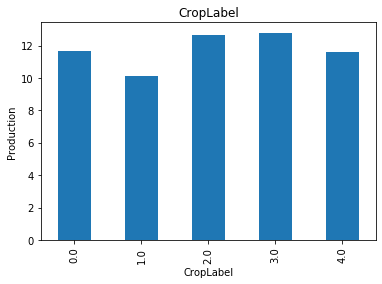

In [166]:
# let me show you what I mean by monotonic relationship between labels and target
def analyse_vars(df, var):
    df = df.copy()
    df.groupby(var)['Production'].median().plot.bar()
    plt.title(var)
    plt.ylabel('Production')
    plt.show()
    

analyse_vars(X_train, 'CropLabel')

In [167]:
train_vars = [var for var in X_train.columns if var not in ['Year', 'CropLabel']]
len(train_vars)

64

In [168]:
X_train['CropLabel'].reset_index(drop=True)

0      1.0
1      1.0
2      0.0
3      2.0
4      1.0
5      3.0
6      0.0
7      0.0
8      3.0
9      1.0
10     1.0
11     0.0
12     2.0
13     0.0
14     0.0
15     0.0
16     0.0
17     2.0
18     0.0
19     4.0
20     1.0
21     0.0
22     2.0
23     1.0
24     1.0
25     0.0
26     0.0
27     1.0
28     0.0
29     0.0
      ... 
302    0.0
303    0.0
304    2.0
305    1.0
306    2.0
307    1.0
308    2.0
309    0.0
310    2.0
311    1.0
312    1.0
313    2.0
314    1.0
315    0.0
316    3.0
317    1.0
318    4.0
319    0.0
320    0.0
321    0.0
322    0.0
323    1.0
324    4.0
325    3.0
326    0.0
327    1.0
328    3.0
329    0.0
330    4.0
331    3.0
Name: CropLabel, Length: 332, dtype: float64

In [169]:
# fit scaler
scaler = MinMaxScaler() # create an instance
scaler.fit(X_train[train_vars]) #  fit  the scaler to the train set for later use

# transform the train and test set, and add on the Id and SalePrice variables
X_train = pd.concat([X_train[['CropLabel']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(X_train[train_vars]), columns=train_vars)],
                    axis=1)

X_test = pd.concat([X_test[['CropLabel']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(X_test[train_vars]), columns=train_vars)],
                    axis=1)

In [170]:
X_train.isnull().sum()

CropLabel                 0
Unnamed: 0                0
Unnamed: 0.1              0
Zone                      0
PRECIP                    0
TMPMAX                    0
TMPMIN                    0
RELHUM                    0
WINDLY                    0
SUNHRS                    0
Irrg_Yes                  0
Irrg_No                   0
Seed_Improved             0
Seed_Not_Improved         0
Damage_Yes                0
Damage_No                 0
Dreason_Crop_disease      0
Dreason_Frost             0
Dreason_Floods            0
Dreason_Locust            0
Dreason_Insects           0
Dreason_Toolittle_rain    0
Dreason_Toomuch_rain      0
Dreason_Wild_animals      0
Dreason_Birds             0
Dreason_Hail              0
Dreason_Weeds             0
Dreason_ShortageSeed      0
Dreason_DepletionSoil     0
Dreason_Security          0
                         ..
Dmtype_Both               0
Dmchem_Insecticide        0
Dmchem_Herbicide          0
Dmchem_Fungicide          0
Dmchem_Insectcide_He

In [171]:
########################################################################################################################

In [172]:
# capture the target
y_train = X_train['CropLabel']
y_test = X_test['CropLabel']

# drop unnecessary variables from our training and testing sets
X_train.drop(['CropLabel'], axis=1, inplace=True)
X_test.drop(['CropLabel'], axis=1, inplace=True)

In [173]:
X_train = X_train.iloc[:, 2:]

In [174]:
X_train.head()

,Zone,PRECIP,TMPMAX,TMPMIN,RELHUM,WINDLY,SUNHRS,Irrg_Yes,Irrg_No,Seed_Improved,Seed_Not_Improved,Damage_Yes,Damage_No,Dreason_Crop_disease,Dreason_Frost,Dreason_Floods,Dreason_Locust,Dreason_Insects,Dreason_Toolittle_rain,Dreason_Toomuch_rain,Dreason_Wild_animals,Dreason_Birds,Dreason_Hail,Dreason_Weeds,Dreason_ShortageSeed,Dreason_DepletionSoil,Dreason_Security,Dreason_UseBadCrop,Dmeasure_Yes,Dmeasure_No,Dmtype_Chemical,Dmtype_NonChemical,Dmtype_Both,Dmchem_Insecticide,Dmchem_Herbicide,Dmchem_Fungicide,Dmchem_Insectcide_Her,Dmchem_Insectcide_Fun,Dmchem_Herbicide_Fung,Dmchem_All,Fert_Yes,Fert_No,Ferttype_Natural,Ferttype_Chemical,Ferttype_Both,D22a_Urea,D22a_DAP,D22a_Urea_DAP,D22a_NPS,D22a_Urea_NPS,D22a_Mixed,D23_Manure,D23_Compost,D23_Organic,D23_Manure_Compost,D23_Manure_Organic,D23_Compost_Organic,D23_All,Fweight,Area,Production,Crop
0,0.000000,0.867912,0.266394,0.501659,0.441609,0.063146,0.044295,0.000000,0.016579,0.000000,0.016592,0.016909,0.004695,0.000000,0.011628,0.000000,0.0,0.000000,0.026211,0.00000,0.000000,0.0,0.005291,0.000000,0.0,0.000000,0.0,0.010989,0.016640,0.000000,0.000000,0.016762,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.007739,0.023589,0.010811,0.001896,0.000000,0.000000,0.003745,0.000863,0.0,0.0,0.0,0.012270,0.003922,0.000000,0.000000,0.000000,0.000000,0.0,0.505580,0.476286,0.256008,0.000000
1,1.000000,0.341458,1.000000,1.000000,0.170080,0.919825,1.000000,0.000000,0.005257,0.000000,0.005261,0.000939,0.009390,0.000000,0.000000,0.000000,0.0,0.001309,0.000000,0.00152,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.005276,0.000000,0.000000,0.005315,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.002211,0.008425,0.003604,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.003067,0.003922,0.000000,0.000000,0.000000,0.000000,0.0,0.270674,0.479201,0.241331,0.857143
2,0.666667,0.416917,0.000000,0.015069,0.666392,0.394871,0.364024,0.029412,0.065912,0.003268,0.065965,0.052607,0.041471,0.000000,0.069767,0.000000,0.0,0.006545,0.077840,0.00152,0.000000,0.0,0.000000,0.005102,0.0,0.000000,0.0,0.000000,0.062500,0.017308,0.000000,0.061325,0.009324,0.000000,0.002667,0.000000,0.005236,0.0,0.0,0.0,0.075732,0.023589,0.018919,0.069194,0.084813,0.331492,0.022472,0.042278,0.0,0.0,0.0,0.017382,0.062745,0.111111,0.120968,0.000000,0.000000,0.0,0.672128,0.696395,0.419923,0.285714
3,0.666667,0.755323,0.019981,0.233691,1.000000,0.126579,0.056333,0.441176,0.756975,0.009804,0.762040,0.497417,0.647887,0.128205,0.046512,0.724138,0.0,0.045812,0.034154,1.00000,0.277228,0.0,0.174603,0.346939,0.1,0.773913,0.0,0.362637,0.754464,0.050000,0.061538,0.754702,0.002331,0.036199,0.013333,0.081081,0.000000,0.0,0.0,0.0,0.773908,0.403538,0.753153,0.397156,0.331361,0.662983,0.561798,0.282140,0.0,0.0,0.0,0.647239,0.772549,0.000000,0.649194,0.090909,0.666667,0.0,0.968752,0.915600,0.611418,0.000000
4,1.000000,0.320449,0.912813,0.802906,0.170080,0.543183,0.632809,0.000000,0.004044,0.000000,0.004047,0.000000,0.008607,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.004058,0.000000,0.000000,0.004088,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.002764,0.005055,0.003604,0.000948,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.005112,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.283184,0.566988,0.394956,0.714286


In [175]:
X_test = X_test.iloc[:, 2:]

In [176]:
pca = PCA(n_components = None)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
explained_variance=pca.explained_variance_ratio_

In [177]:
explained_variance

array([3.60653595e-01, 1.45633376e-01, 9.21343661e-02, 6.57580279e-02,
       5.05353536e-02, 4.02871957e-02, 3.37030396e-02, 2.42400467e-02,
       1.60996592e-02, 1.51384722e-02, 1.43864028e-02, 1.34582971e-02,
       1.19242421e-02, 9.77335853e-03, 9.57762522e-03, 8.33106342e-03,
       7.60391499e-03, 7.02208388e-03, 6.01091336e-03, 5.36008773e-03,
       4.93483826e-03, 4.36194757e-03, 4.27687437e-03, 4.18635715e-03,
       3.54336035e-03, 3.49523698e-03, 3.35140465e-03, 2.88530028e-03,
       2.73621232e-03, 2.51980617e-03, 2.41983815e-03, 2.19084304e-03,
       2.13033311e-03, 2.03509540e-03, 1.77708822e-03, 1.63087829e-03,
       1.51204880e-03, 1.45333021e-03, 1.38024140e-03, 1.25111207e-03,
       1.18785007e-03, 1.04645219e-03, 9.83937303e-04, 9.35996506e-04,
       8.44095987e-04, 7.65156375e-04, 6.75091767e-04, 5.12789569e-04,
       4.56458127e-04, 3.17199906e-04, 2.51543233e-04, 1.67122330e-04,
       1.32495048e-04, 7.00496234e-06, 5.58726638e-06, 3.42523027e-06,
      

In [178]:
pca = PCA(n_components = 13)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
explained_variance=pca.explained_variance_ratio_

In [179]:
# train the model
classifier=SVC(kernel='rbf',random_state=0)
classifier.fit(X_train,y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [180]:
# evaluate the model:
# remember that we log transformed the output  in our feature engineering notebook / lecture.

# In order to get the true performance of the Lasso
# we need to transform both the target and the predictions
# back to the original agriculture values.

# We will evaluate performance using the mean squared error and the
# root of the mean squared error

pred = classifier.predict(X_train)
print('linear train mse: {}'.format(mean_squared_error(np.exp(y_train), np.exp(pred))))
print('linear train rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_train), np.exp(pred)))))
print()
pred = classifier.predict(X_test)
print('linear test mse: {}'.format(mean_squared_error(np.exp(y_test), np.exp(pred))))
print('linear test rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_test), np.exp(pred)))))
print()
print('Average house price: ', np.exp(y_train).median())

linear train mse: 231.73139249976794
linear train rmse: 15.222726184877923

linear test mse: 172.42970180155515
linear test rmse: 13.131249057174841

Average house price:  2.718281828459045


In [181]:
cm=confusion_matrix(y_test, pred)

In [182]:
cm

array([[32,  0,  0,  0,  0],
       [17,  6,  1,  0,  0],
       [13,  1,  3,  0,  0],
       [ 7,  0,  0,  0,  0],
       [ 3,  1,  0,  0,  0]], dtype=int64)

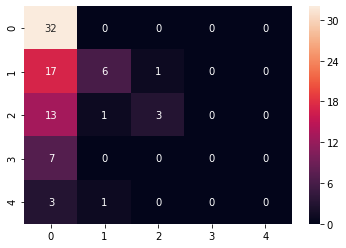

In [183]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

Text(0.5, 1.0, 'Evaluation of Logistic Predictions')

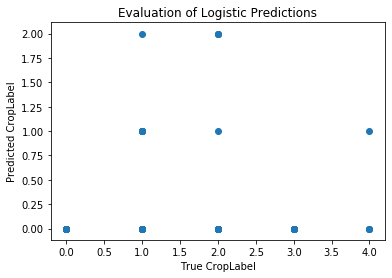

In [184]:
# let's evaluate our predictions respect to the original price
plt.scatter(y_test, classifier.predict(X_test))
plt.xlabel('True CropLabel')
plt.ylabel('Predicted CropLabel')
plt.title('Evaluation of Logistic Predictions')